# La idea es generar un **clasificador de SPAMs** para una set de datos en particular
## Para la realizacion de este clasificador, no se utilizará nada tan sotisficado (solo contabilizando las palabras de la oracion determinando si el mensaje corresponde a un SPAM)
Fuente:
 - https://www.youtube.com/watch?v=VDg8fCW8LdM
 

In [3]:
import pandas as pd

ruta = 'C:/Users/rodrigo/Desktop/github/Canales de Youtube/Python Simplified/SMSSpamCollection.txt'
archivo = pd.read_csv(ruta, sep='\t', header=None, names=['label', 'sms']) # \t es para indicar una separacion por tab
archivo.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
# remover simbolos de puntuacion y palabras como if, else, etc
import string
import nltk

nltk.download('stopwords')
nltk.download('punkt')

stopwords = nltk.corpus.stopwords.words('english')
punctuation = string.punctuation

print(stopwords[:5])
print(punctuation)

['i', 'me', 'my', 'myself', 'we']
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rodrigo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rodrigo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
# crearemos unna funcion que preprocese los mensajes
## una forma de estandarizar los mensajes
def pre_process(sms):
    # remover mayusculas y signos de puntuacion
    lowercase = "".join([palabra.lower() for palabra in sms if palabra not in punctuation])
    # devuelve las oraciones como lista de palabras
    tokenize = nltk.tokenize.word_tokenize(lowercase)
    # por ultimo, debemos remover las palabras que no sirven
    remove_stopwords = [palabra for palabra in tokenize if palabra not in stopwords]
    return remove_stopwords

'''palabra = 'RODRIGO'
print(palabra)
palabra = pre_process(palabra)
print(palabra)
'''
archivo['processed'] = archivo['sms'].apply(lambda x: pre_process(x))
archivo.head()


,label,sms,processed
0,ham,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, goes, usf, lives, around, t..."


In [22]:
# ahora vamos a contabilizar las palabras segun las categorias (spam o no_spam)
def categorize_words():
    spam_words = []
    ham_words = []
    
    # palabras asociadas con SPAMs
    ## se agregan a una lista todas las palabras de todos los mensajes que son SPAM
    for sms in archivo['processed'][archivo['label'] == 'spam']:
        for word in sms:
            spam_words.append(word)

    # palabras asociadas con HAM
    ## se agregan a una lista todas las palabras de todos los mensajes que son NO SON SPAM
    for sms in archivo['processed'][archivo['label'] == 'ham']:
        for word in sms:
            ham_words.append(word)
            
    return spam_words, ham_words
        
# usemos la funcion que acabamos de crear
lista_spam, lista_no_spam = categorize_words()

print(lista_spam[:5])
print(lista_no_spam[:5])
        
        

['free', 'entry', '2', 'wkly', 'comp']
['go', 'jurong', 'point', 'crazy', 'available']


In [32]:
# ahora vamos a hacer la funcion que predice si el nuevo mensaje va a corresponder a un SPAM o No
## La manera que va a funcionar esta funcion es la siguiente:
## 1) analizamos por separado cada palabra del mensaje que le entreguemos como input
## 2) cada palabra individual se buscara si se encuentra mas repetida en la lista de SPAM o en la que No
## 3) en un contador se suma la cantidad de veces que aparece cada palabra
## 4) si al final del ejercicio, el contador de spam resulta mayor que el de ham -> predice que es SPAM

def predict(mensaje_entrada):
    spam_counter = 0
    ham_counter = 0
    
    for palabra in mensaje_entrada:
        spam_counter += lista_spam.count(palabra)
        ham_counter += lista_no_spam.count(palabra)
    
    if ham_counter > spam_counter:
        probabilidad = round(ham_counter/(ham_counter + spam_counter), 2)*100
        print('-> el mensaje NO ES UN SPAM\n')
        print('--> probabilidad {} %'.format(probabilidad))
    elif ham_counter < spam_counter:
        probabilidad = round(spam_counter/(ham_counter + spam_counter), 2)*100
        print('-> el mensaje es un SPAM\n')
        print('--> probabilidad {} %'.format(probabilidad))
    elif ham_counter == spam_counter:
        print('-> no se sabe')

    

In [33]:
# ahora probemos la funcion
mensaje_entrada = input('escribe un mensaje y veamos si corresponde a un SPAM o NO: \n')

# preprocesamos el mensaje de entrada
mensaje_entrada = pre_process(mensaje_entrada)

# predecimos si es un SPAM o NO
predict(mensaje_entrada)

escribe un mensaje y veamos si corresponde a un SPAM o NO: 
congratulations, you win
-> el mensaje es un SPAM

--> probabilidad 85.0 %


## Lo que quiero hacer ahora, es ver si este codigo se puede adaptar para mansajes en español

Algunas ideas:
 - Recuerdo haber visto que desde google drive en un excel, existia una funcion para traducir una celda
  - Con lo cual, luego podria descargar el archivo, guardarlo como csv y cargarlo aqui como en el anterior codigo
 - Otra cosa que quiero ver es si la biblioteca 'nltk' cuenta con el idioma español, para filtrar las palabras conflictivas
 

In [11]:
import nltk # The natural lenguage toolkit
nltk.corpus.stopwords.words('spanish')


['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

## Ahora veamos como traducir cada mensaje al español
Aqui encontre la fuente:
- https://gsuitetips.com/tips/sheets/translate-languages-in-google-sheets/

Lo que dice que hay que hacer es utilizar la formula GOOGLETRANSLATE(A2, “en”,”es”)

Pasos adicionales:
 - Hacer una copia del archivo de texto
 - Abrirlo y guardar la copia como un archivo .csv
 - Subir el archivo a google drive
 - Abrirlo con Google Sheets, utilizar esta formula, reemplazar los valores y guardar el archivo.

Notas: Ojo que tuve que cambiar las ',' por ';'
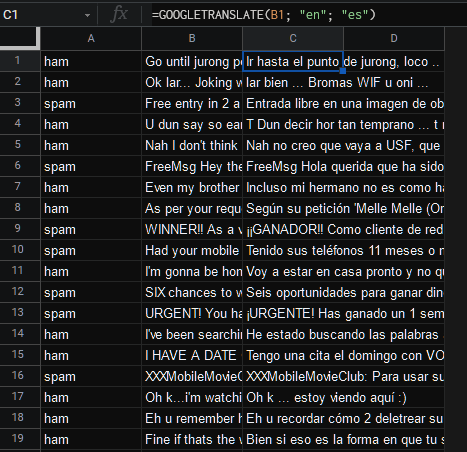

## Listo, ahora cambiemos algunas partes del codigo anterior y veamos si funciona este clasificador adaptado al español


In [12]:
import pandas as pd

ruta = 'C:/Users/rodrigo/Desktop/github/Canales de Youtube/Python Simplified/SMSSpamCollectionEspanol.csv'
archivo = pd.read_csv(ruta, sep=',', header=None, names=['label', 'sms'])
archivo.head()

,label,sms
0,ham,"Ir hasta el punto de jurong, loco .. Disponibl..."
1,ham,lar bien ... Bromas WIF u oni ...
2,spam,Entrada libre en una imagen de obsequio 2 wkly...
3,ham,T Dun decir hor tan temprano ... t r ya contin...
4,ham,"Nah no creo que vaya a USF, que vive por aquí,..."


In [13]:
# remover simbolos de puntuacion y palabras como if, else, etc
import string
import nltk

nltk.download('stopwords')
nltk.download('punkt')

stopwords = nltk.corpus.stopwords.words('spanish')
punctuation = string.punctuation

print(stopwords[:5])
print(punctuation)

['de', 'la', 'que', 'el', 'en']
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rodrigo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rodrigo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
def pre_process(sms):
    lowercase = "".join([palabra.lower() for palabra in sms if palabra not in punctuation])
    tokenize = nltk.tokenize.word_tokenize(lowercase)
    remove_stopwords = [palabra for palabra in tokenize if palabra not in stopwords]
    return remove_stopwords

archivo['processed'] = archivo['sms'].apply(lambda x: pre_process(x))
archivo.head()

,label,sms,processed
0,ham,"Ir hasta el punto de jurong, loco .. Disponibl...","[ir, punto, jurong, loco, disponible, sólo, bu..."
1,ham,lar bien ... Bromas WIF u oni ...,"[lar, bien, bromas, wif, u, oni]"
2,spam,Entrada libre en una imagen de obsequio 2 wkly...,"[entrada, libre, imagen, obsequio, 2, wkly, ga..."
3,ham,T Dun decir hor tan temprano ... t r ya contin...,"[t, dun, decir, hor, tan, temprano, t, r, cont..."
4,ham,"Nah no creo que vaya a USF, que vive por aquí,...","[nah, creo, vaya, usf, vive, aquí, aunque]"


In [15]:
def categorize_words():
    spam_words = []
    ham_words = []
    
    for sms in archivo['processed'][archivo['label'] == 'spam']:
        for word in sms:
            spam_words.append(word)

    for sms in archivo['processed'][archivo['label'] == 'ham']:
        for word in sms:
            ham_words.append(word)
            
    return spam_words, ham_words
        
lista_spam, lista_no_spam = categorize_words()

print(lista_spam[:5])
print(lista_no_spam[:5])

['entrada', 'libre', 'imagen', 'obsequio', '2']
['ir', 'punto', 'jurong', 'loco', 'disponible']


In [16]:
def predict(mensaje_entrada):
    spam_counter = 0
    ham_counter = 0
    
    for palabra in mensaje_entrada:
        spam_counter += lista_spam.count(palabra)
        ham_counter += lista_no_spam.count(palabra)
    
    if ham_counter > spam_counter:
        probabilidad = round(ham_counter/(ham_counter + spam_counter), 2)*100
        print('-> el mensaje NO ES UN SPAM\n')
        print('--> probabilidad {} %'.format(probabilidad))
    elif ham_counter < spam_counter:
        probabilidad = round(spam_counter/(ham_counter + spam_counter), 2)*100
        print('-> el mensaje es un SPAM\n')
        print('--> probabilidad {} %'.format(probabilidad))
    elif ham_counter == spam_counter:
        print('-> no se sabe')

In [17]:
mensaje_entrada = input('escribe un mensaje y veamos si corresponde a un SPAM o NO: \n')
mensaje_entrada = pre_process(mensaje_entrada)
predict(mensaje_entrada)

escribe un mensaje y veamos si corresponde a un SPAM o NO: 
Felicitaciones, has ganado el premio mayor
-> el mensaje es un SPAM

--> probabilidad 93.0 %


## Al parecer, tuvimos exito en la adaptación al Español. Pero, a medida que fui desarrollando esto, me quede con la duda sobre la proporcion de mesajes de SPAM vs NO SPAM.

### Esto podria llegar a ser relevante, ya que el metodo que estamos utilizando solo suma la cantidad de veces en que aparece una palabra (**no contabiliza proporcionalmente**).

### **Ojo: Que esto no se malinterprete como una critica, sino mas bien como un recordatorio de porque puede ser importante analizar, al menos, las proporciones en como vienen los datos.**

Ejemplos de una situacion conflictiva:
- NO_SPAM    '... ganaste ...'
- NO_SPAM    '... ganaste ...'
- NO_SPAM    '... ganaste ...'
- NO_SPAM    '... hola ...'
- SPAM       '... ganaste, ganaste ...' 

Si estos fueran nuestros datos y si preguntaramos por la palabra 'ganaste' con el anterior codigo, **este nos habria predicho NO_SPAM**, por la siguiente razon.
- Contabilizador_SPAM = 2
- Contabilizador_NO_SPAM = 3
- -> NO_SPAM > SPAM, **se predice NO_SPAM**

¿Que sucede si, en lugar de sumar el total de veces en que apararece una palabra, **sumamos las proporciones(num veces la palabra/total mensajes categoria)**? 
- Proporcion_SPAM = 2/1 = 2
- Proporcion_NO_SPAM = 3/4 = 0.75
- -> NO_SPAM < SPAM, **se predice SPAM**

### Bien, ahora verifiquemos si la situacion anterior se encuentra presente en los datos de entrada

In [1]:
import pandas as pd

ruta = 'C:/Users/rodrigo/Desktop/github/Canales de Youtube/Python Simplified/SMSSpamCollectionEspanol.csv'
archivo = pd.read_csv(ruta, sep=',', header=None, names=['label', 'sms'])

Total_mensajes = len(archivo)
Total_mensajes_spam = 0
Total_mensajes_no_spam = 0

for mensaje in range(Total_mensajes):
    if archivo['label'][mensaje] == 'spam':
        Total_mensajes_spam += 1
    elif archivo['label'][mensaje] == 'ham':
        Total_mensajes_no_spam += 1

proporcion_spam = round((Total_mensajes_spam/Total_mensajes), 2)*100
proporcion_no_spam = round((Total_mensajes_no_spam/Total_mensajes), 2)*100

print('Total_mensajes_spam: ', Total_mensajes_spam, ' proporcion_spam: ', proporcion_spam, '%')
print('Total_mensajes_no_spam: ', Total_mensajes_no_spam, ' proporcion_no_spam: ', proporcion_no_spam, '%')
print('Total_mensajes: ', Total_mensajes)


Total_mensajes_spam:  747  proporcion_spam:  13.0 %
Total_mensajes_no_spam:  4825  proporcion_no_spam:  87.0 %
Total_mensajes:  5572


## Mirando esto, resulta que es bastante posible que se generé la situacion antes descrita (**casi 9 de cada 10 mensajes NO SON SPAM**)
### De hecho, no es tan descabellado pensar que, en la medida que la extension del mensaje aumente, tambien lo hará la posibilidad de que nuestro clasificador prediga un mensaje como NO_SPAM.

# Bien, no nos quedemos en la negativa y veamos alguna manera de combatir esta situacion.

## Creo que, justamente, hacer un **arreglo proporcional** al final del codigo ayudaria a realizar una prediccion mas justa, pero, antes de continuar, aun nos falta decidir un metodo con el cual comprobar esta hipotesis.

### Les propongo lo siguiente. Particionemos los datos en 2 grupos. En el primero se encontraran los datos 'Historicos' (por asi decirlo), siendo estos los mensajes de los que tendremos conocimiento. Asimismo, el segundo grupo contendra mensajes nunca antes vistos, los llamaremos mensajes de 'Prueba'. La particion se realizara un 80% mensajes Historicos y un 20% mensajes de prueba. Luego, el metodo predictivo se realizará en base a los datos historicos y se pondra a prueba su eficiencia, justamente, con los datos de prueba.


In [8]:
# Comenzemos particionando los datos
total_historico = round(Total_mensajes*0.8)
total_prueba = round(Total_mensajes*0.2)
#print(total_historico) #4458
#print(total_prueba) #1114

historico = archivo[['label', 'sms']][:4458]
prueba = archivo[['label', 'sms']][4458:5571]
print(historico)
print(prueba)



     label                                                sms
0      ham  Ir hasta el punto de jurong, loco .. Disponibl...
1      ham                  lar bien ... Bromas WIF u oni ...
2     spam  Entrada libre en una imagen de obsequio 2 wkly...
3      ham  T Dun decir hor tan temprano ... t r ya contin...
4      ham  Nah no creo que vaya a USF, que vive por aquí,...
...    ...                                                ...
4453   ham  Le he dicho que todo va a parar. Apenas no dej...
4454   ham                        O supongo & lt; # & gt; min
4455   ham            Estoy en casa. tiempo wat ARD u llegar?
4456   ham  El asalto a msg: Wen u Levante phne d, u decir...
4457   ham  Si desea Mapquest o algo mirar hacia arriba "U...

[4458 rows x 2 columns]
     label                                                sms
4458   ham  Aight debe planificar acabo de llegar más tard...
4459   ham  Die ... He eliminado accidentalmente e msg sup...
4460  spam  Bienvenido a UK-móvil actualizado

## Bien, ahora tendremos que repetir el proceso

In [9]:
import string
import nltk

nltk.download('stopwords')
nltk.download('punkt')

stopwords = nltk.corpus.stopwords.words('spanish')
punctuation = string.punctuation

def pre_process(sms):
    lowercase = "".join([palabra.lower() for palabra in sms if palabra not in punctuation])
    tokenize = nltk.tokenize.word_tokenize(lowercase)
    remove_stopwords = [palabra for palabra in tokenize if palabra not in stopwords]
    return remove_stopwords

historico['processed'] = historico['sms'].apply(lambda x: pre_process(x))

def categorize_words():
    spam_words = []
    ham_words = []
    
    for sms in historico['processed'][historico['label'] == 'spam']:
        for word in sms:
            spam_words.append(word)

    for sms in historico['processed'][historico['label'] == 'ham']:
        for word in sms:
            ham_words.append(word)
            
    return spam_words, ham_words
        
lista_spam, lista_no_spam = categorize_words()



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rodrigo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rodrigo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
def predict(mensaje_entrada):
    spam_counter = 0
    ham_counter = 0
    prediccion = ''
    
    for palabra in mensaje_entrada:
        spam_counter += lista_spam.count(palabra)
        ham_counter += lista_no_spam.count(palabra)
    
    if ham_counter > spam_counter:
        prediccion = 'ham'
        #probabilidad = round(ham_counter/(ham_counter + spam_counter), 2)*100
        #print('-> el mensaje NO ES UN SPAM\n')
        #print('--> probabilidad {} %'.format(probabilidad))
    elif ham_counter < spam_counter:
        prediccion = 'spam'
        #probabilidad = round(spam_counter/(ham_counter + spam_counter), 2)*100
        #print('-> el mensaje es un SPAM\n')
        #print('--> probabilidad {} %'.format(probabilidad))
    elif ham_counter == spam_counter:
        prediccion = 'NO SABE'
        #print('-> no se sabe')
        
    return prediccion

## Bien, hasta ahora todo igual (ojo: modifique un poco la funcion de prediccion). Lo siguiente es:
 - estandarizar los datos de prueba
 - utilizar los datos de prueba
 - utilizar la funcion de prediccion
 - generar el contraste con los datos reales
 - sumar los aciertos (al final, sacar la proporcion de aciertos vs total de mensajes)
 

In [16]:
# estandarizar los datos de prueba
prueba['processed'] = prueba['sms'].apply(lambda x: pre_process(x))

# aciertos (codigo sin modificar)
aciertos = 0
inseguros = 0  # se refiere en los casos que la prediccion no logra decidirse por una categoria 
for ind in range(len(prueba)):
    # prediccion    
    prediccion = predict(prueba['processed'][ind + total_historico])
    # clasificacion real
    real = prueba['label'][ind + total_historico]
    if prediccion == real and prediccion != 'NO SABE':
        aciertos += 1
    elif prediccion == 'NO SABE':
        inseguros += 1

print('aciertos: ', aciertos)
print('inseguros: ', inseguros)
print('total_prueba: ', total_prueba)

porcentaje_acierto = round((aciertos/total_prueba), 2)*100
print('porcentaje de acierto: {} %'.format(porcentaje_acierto))

aciertos:  1035
inseguros:  5
total_prueba:  1114
porcentaje de acierto: 93.0 %


## Ahora es que pudimos comprobar la efectividad de la funcion predictiva (93%)
### Analicemos para el caso de utilizar un arreglo proporcional en la prediccion


In [19]:
# cambiamos un poco la funcion
def predict_mod(mensaje_entrada):
    spam_counter = 0
    ham_counter = 0
    prediccion = ''
    
    for palabra in mensaje_entrada:
        spam_counter += lista_spam.count(palabra)
        ham_counter += lista_no_spam.count(palabra)
    
    spam_proportion = spam_counter/Total_mensajes_spam
    ham_proportion = ham_counter/Total_mensajes_no_spam
    
    if ham_proportion > spam_proportion:
        prediccion = 'ham'
        #probabilidad = round(ham_counter/(ham_counter + spam_counter), 2)*100
        #print('-> el mensaje NO ES UN SPAM\n')
        #print('--> probabilidad {} %'.format(probabilidad))
    elif ham_proportion < spam_proportion:
        prediccion = 'spam'
        #probabilidad = round(spam_counter/(ham_counter + spam_counter), 2)*100
        #print('-> el mensaje es un SPAM\n')
        #print('--> probabilidad {} %'.format(probabilidad))
    elif ham_proportion == spam_proportion:
        prediccion = 'NO SABE'
        #print('-> no se sabe')
        
    return prediccion

In [20]:
# aciertos (codigo modificado)
aciertos = 0
inseguros = 0  # se refiere en los casos que la prediccion no logra decidirse por una categoria 
for ind in range(len(prueba)):
    # prediccion modificada    
    prediccion = predict_mod(prueba['processed'][ind + total_historico])
    # clasificacion real
    real = prueba['label'][ind + total_historico]
    if prediccion == real and prediccion != 'NO SABE':
        aciertos += 1
    elif prediccion == 'NO SABE':
        inseguros += 1

print('aciertos: ', aciertos)
print('inseguros: ', inseguros)
print('total_prueba: ', total_prueba)

porcentaje_acierto = round((aciertos/total_prueba), 2)*100
print('porcentaje de acierto: {} %'.format(porcentaje_acierto))

aciertos:  705
inseguros:  5
total_prueba:  1114
porcentaje de acierto: 63.0 %


## mmm, al parecer castiga mucho la forma las proporciones de las categorias.
### Por ultimo, voy a probar un tercer metodo, con el cual espero sumar las proporciones de las palabras en lugar de solo sumar sus apariciones.


In [23]:
# cambiamos un poco la funcion
def predict_mod2(mensaje_entrada):
    spam_counter = 0
    ham_counter = 0
    prediccion = ''
    spam_proportion = 0
    ham_proportion = 0
    
    for palabra in mensaje_entrada:
        spam_counter = lista_spam.count(palabra)
        ham_counter = lista_no_spam.count(palabra)
        if (spam_counter + ham_counter) != 0:
            spam_proportion += (spam_counter/(spam_counter + ham_counter))
            ham_proportion += (ham_counter/(spam_counter + ham_counter))       
            

    if ham_proportion > spam_proportion:
        prediccion = 'ham'
        #probabilidad = round(ham_counter/(ham_counter + spam_counter), 2)*100
        #print('-> el mensaje NO ES UN SPAM\n')
        #print('--> probabilidad {} %'.format(probabilidad))
    elif ham_proportion < spam_proportion:
        prediccion = 'spam'
        #probabilidad = round(spam_counter/(ham_counter + spam_counter), 2)*100
        #print('-> el mensaje es un SPAM\n')
        #print('--> probabilidad {} %'.format(probabilidad))
    elif ham_proportion == spam_proportion:
        prediccion = 'NO SABE'
        #print('-> no se sabe')
        
    return prediccion

In [24]:
# aciertos (codigo modificado)
aciertos = 0
inseguros = 0  # se refiere en los casos que la prediccion no logra decidirse por una categoria 
for ind in range(len(prueba)):
    # prediccion modificada    
    prediccion = predict_mod2(prueba['processed'][ind + total_historico])
    # clasificacion real
    real = prueba['label'][ind + total_historico]
    if prediccion == real and prediccion != 'NO SABE':
        aciertos += 1
    elif prediccion == 'NO SABE':
        inseguros += 1

print('aciertos: ', aciertos)
print('inseguros: ', inseguros)
print('total_prueba: ', total_prueba)

porcentaje_acierto = round((aciertos/total_prueba), 2)*100
print('porcentaje de acierto: {} %'.format(porcentaje_acierto))

aciertos:  1078
inseguros:  6
total_prueba:  1114
porcentaje de acierto: 97.0 %


## Para este caso si se llego a aumetar el acierto de la funcion predictiva (97%).
### De igual forma, seria conveniente definir nuevas particiones de datos, para asi ir obteniendo cada vez mas un numero mas certero sobre la efectividad de la funcion (**La ley de los grandes numeros**)